In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Dataset/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.drop(['education'],axis=1,inplace=True)

In [ ]:
lst=['cigsPerDay','BPMeds','totChol','heartRate','glucose']
for i in lst:
  df[i]=df[i].fillna(df[i].mode()[0])
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [ ]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X=sd.fit_transform(X)


In [ ]:
y.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1)
X_os,y_os=sm.fit_resample(X,y)
y_os.value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_pred

array([1, 1, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.95      0.66      0.77      1074
           1       0.74      0.96      0.84      1084

    accuracy                           0.81      2158
   macro avg       0.84      0.81      0.81      2158
weighted avg       0.84      0.81      0.81      2158



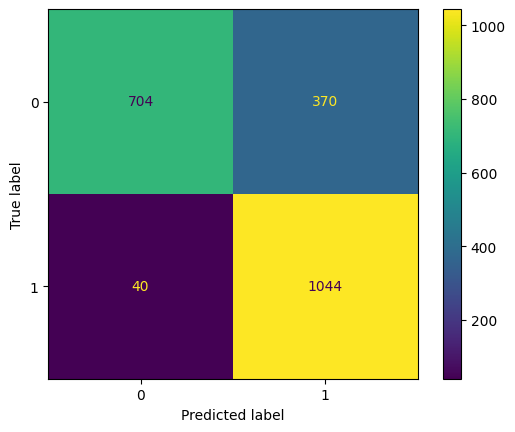

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,knn_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,knn_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)
nb_pred

array([1, 0, 0, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.55      0.89      0.68      1074
           1       0.73      0.29      0.42      1084

    accuracy                           0.59      2158
   macro avg       0.64      0.59      0.55      2158
weighted avg       0.64      0.59      0.55      2158



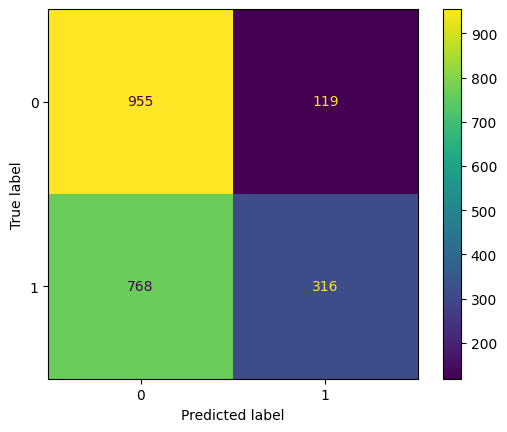

In [ ]:
print(classification_report(y_test,nb_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,nb_pred))

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)
sv_pred=sv.predict(X_test)


              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1074
           1       0.67      0.70      0.69      1084

    accuracy                           0.68      2158
   macro avg       0.68      0.68      0.68      2158
weighted avg       0.68      0.68      0.68      2158



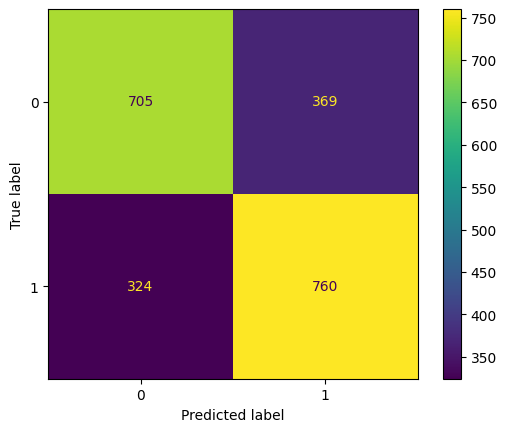

In [ ]:
print(classification_report(y_test,sv_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,sv_pred))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=1)
X_us,y_us=rus.fit_resample(X,y)
y_us.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
nb_us=GaussianNB()
nb_us.fit(X_train,y_train)
pred_nb_us=nb_us.predict(X_test)
pred_nb_us

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.53      0.98      0.69       196
           1       0.85      0.12      0.20       191

    accuracy                           0.55       387
   macro avg       0.69      0.55      0.45       387
weighted avg       0.69      0.55      0.45       387



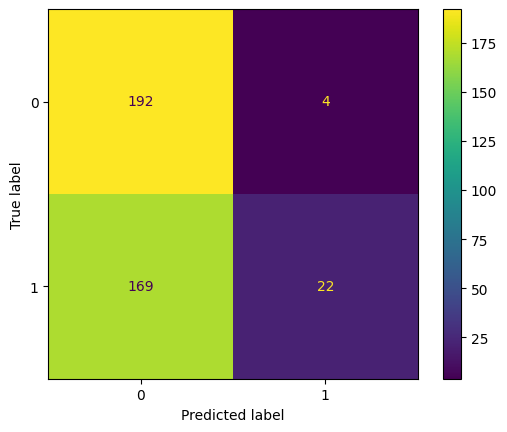

In [ ]:
print(classification_report(y_test,pred_nb_us))
print(ConfusionMatrixDisplay.from_predictions(y_test,pred_nb_us))

In [ ]:

sv_us=SVC(kernel='linear')
sv_us.fit(X_train,y_train)
sv_us_pred=sv_us.predict(X_test)
sv_us_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       196
           1       0.65      0.70      0.67       191

    accuracy                           0.66       387
   macro avg       0.67      0.66      0.66       387
weighted avg       0.67      0.66      0.66       387



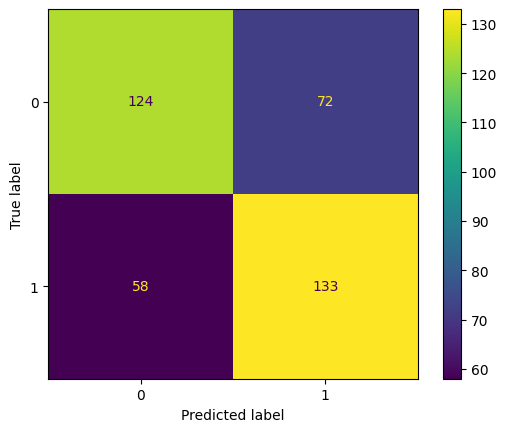

In [ ]:
print(classification_report(y_test,sv_us_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,sv_us_pred))

In [ ]:
knn_us=KNeighborsClassifier()
knn_us.fit(X_train,y_train)
pred_knn_us=knn_us.predict(X_test)

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       196
           1       0.62      0.56      0.59       191

    accuracy                           0.61       387
   macro avg       0.61      0.61      0.61       387
weighted avg       0.61      0.61      0.61       387



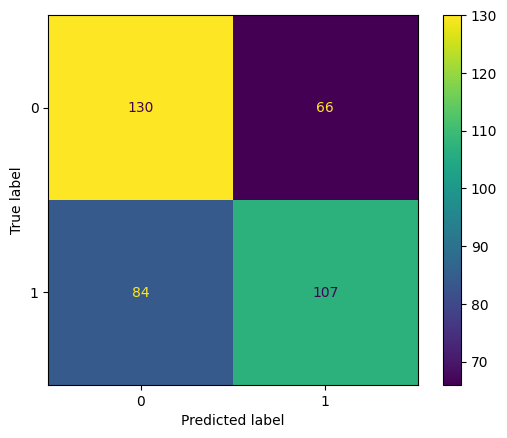

In [ ]:
print(classification_report(y_test,pred_knn_us))
print(ConfusionMatrixDisplay.from_predictions(y_test,pred_knn_us))